# TP 1 –Données Tabulaires

## 1. Analyse du jeu de données

### 1.1 Etude globale du dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_pickle("dataset_RH.pkl")

X = data[0]
y = data[1]

print("Dimensions de X :", X.shape)
print("Dimensions de y :", len(y))

Dimensions de X : (23857, 13)
Dimensions de y : 23857


In [2]:
data = X.copy()
data["Demission"] = y
data.head()

,Famille d'emploi,Dernière promotion (mois),Dernière augmentation (mois),Début de contrat (années),Ancienneté groupe (années),Etablissement,Âge (années),Parent,Niveau hiérarchique,Salaire (Euros),Statut marital,Véhicule,matricule,Demission
0,Production,8.510000,7.900000,0.910000,0.970000,27,30,1,1,3199,Marié(e),0,32,0
1,Production,35.119999,22.690001,14.830000,16.299999,7,45,1,2,3861,Marié(e),1,1890,0
2,Production,25.299999,22.139999,17.309999,17.790001,28,49,1,2,4324,PACS,1,1847,0
3,Production,5.240000,5.100000,1.020000,1.750000,27,24,0,1,2641,Célibataire,0,2619,1
4,Production,35.919998,22.840000,8.050000,9.000000,7,46,1,2,5072,Marié(e),1,1963,0


In [3]:
data.isnull().sum()

Famille d'emploi                0
Dernière promotion (mois)       0
Dernière augmentation (mois)    0
Début de contrat (années)       0
Ancienneté groupe (années)      0
Etablissement                   0
Âge (années)                    0
Parent                          0
Niveau hiérarchique             0
Salaire (Euros)                 0
Statut marital                  0
Véhicule                        0
matricule                       0
Demission                       0
dtype: int64

On remarque que notre jeu de données ne possède aucune données manquantes. Toutes les colonnes on 23857 instances, ce qui correspond bien aux dimensions initiales de notre dataset. Cf la cellule ci-dessous afin de confirmer cela ainsi que d'observer les différents types de nos features.

In [4]:
#Informations sur les features
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23857 entries, 0 to 23856
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Famille d'emploi              23857 non-null  object 
 1   Dernière promotion (mois)     23857 non-null  float64
 2   Dernière augmentation (mois)  23857 non-null  float64
 3   Début de contrat (années)     23857 non-null  float64
 4   Ancienneté groupe (années)    23857 non-null  float64
 5   Etablissement                 23857 non-null  int64  
 6   Âge (années)                  23857 non-null  int64  
 7   Parent                        23857 non-null  int64  
 8   Niveau hiérarchique           23857 non-null  int64  
 9   Salaire (Euros)               23857 non-null  int64  
 10  Statut marital                23857 non-null  object 
 11  Véhicule                      23857 non-null  int64  
 12  matricule                     23857 non-null  int64  
 13  D

In [5]:
data.describe()

,Dernière promotion (mois),Dernière augmentation (mois),Début de contrat (années),Ancienneté groupe (années),Etablissement,Âge (années),Parent,Niveau hiérarchique,Salaire (Euros),Véhicule,matricule,Demission
count,23857.000000,23857.000000,23857.000000,23857.000000,23857.000000,23857.000000,23857.000000,23857.000000,23857.000000,23857.000000,23857.000000,23857.000000
mean,29.460739,7.934986,7.530322,11.632095,20.193947,41.767154,0.720711,1.554554,4168.404032,0.506853,1361.255858,0.031647
std,25.497874,7.549982,5.985476,9.218618,9.295469,11.014444,0.448659,0.657887,1657.829824,0.500299,794.183153,0.175062
min,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000,1.000000,2134.000000,0.000000,0.000000,0.000000
25%,10.590000,3.180000,2.300000,3.800000,11.000000,34.000000,0.000000,1.000000,3197.000000,0.000000,655.000000,0.000000
50%,21.219999,5.880000,6.280000,9.870000,26.000000,41.000000,1.000000,1.000000,3629.000000,1.000000,1371.000000,0.000000
75%,41.400002,10.340000,11.070000,16.320000,28.000000,49.000000,1.000000,2.000000,4511.000000,1.000000,2072.000000,0.000000
max,152.970001,84.050003,33.119999,45.619999,36.000000,100.000000,1.000000,4.000000,18137.000000,2.000000,2675.000000,1.000000


On observe à partir des statistiques que nous avons un employé qui à 100 ans et qui n'as pas démissioné ce qui n'est pas très cohérent...

In [6]:
employes_100_ans = data[data["Âge (années)"] == 100]
employes_100_ans

,Famille d'emploi,Dernière promotion (mois),Dernière augmentation (mois),Début de contrat (années),Ancienneté groupe (années),Etablissement,Âge (années),Parent,Niveau hiérarchique,Salaire (Euros),Statut marital,Véhicule,matricule,Demission
22390,Commercial/Business,50.470001,33.16,4.51,41.380001,13,100,1,2,18137,ex PACS,0,1609,0


On peut donc s'intéresser aux employés ayant + de 70 ans qui devrait donc démissionner d'ici peu!

In [7]:
print(f"Nombre d'employés ayant plus de 70 ans: {(data['Âge (années)'] >= 70).sum()}")
print(f'Nombre d\'employés ayant plus de 70 ans et n\'ayant pas démissionné: {data[(data["Âge (années)"] > 70) & (data["Demission"] == 0)].shape[0]}')

Nombre d'employés ayant plus de 70 ans: 433
Nombre d'employés ayant plus de 70 ans et n'ayant pas démissionné: 389


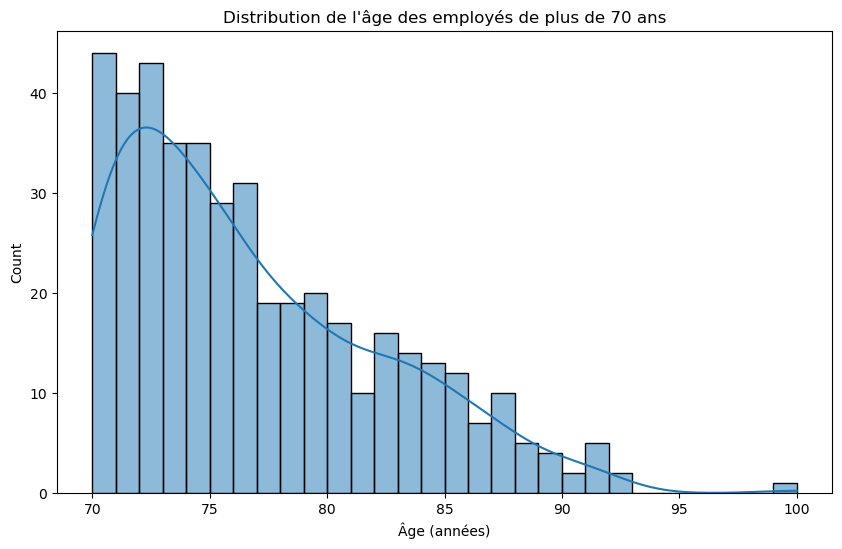

In [8]:
#graphe de distribution de l'âge de + de 70 ans
plt.figure(figsize=(10, 6))
sns.histplot(data=data[data["Âge (années)"] >= 70], x="Âge (années)", bins=30, kde=True)
plt.title("Distribution de l'âge des employés de plus de 70 ans")
plt.show()

### 1.2 Etudes distributions des features

In [9]:
duplicates = data[data.duplicated("matricule", keep=False)]
nb_duplicates = duplicates.shape[0]
print("Nombre de cas avec des matricules en double :", nb_duplicates)

duplicates_all = duplicates[duplicates.duplicated(keep=False)]
print("Nombre total de lignes dupliquées (identiques sur toutes les colonnes) :",duplicates_all.shape[0])

Nombre de cas avec des matricules en double : 23671
Nombre total de lignes dupliquées (identiques sur toutes les colonnes) : 0


In [10]:
print(data["Famille d'emploi"].value_counts())
print(f"""Nombre de différentes familles d'emploi: {data["Famille d'emploi"].nunique()}""")


Famille d'emploi
Production                  10833
Etudes & Technique           4668
Support                      3876
Commercial/Business          1682
Matériel/Equipement          1548
IT                            723
Développement Immobilier      395
Management                    132
Name: count, dtype: int64
Nombre de différentes familles d'emploi: 8


In [11]:
print(f"Nombre de différents d'établissements: {data['Etablissement'].nunique()}")

Nombre de différents d'établissements: 35


In [12]:
print(f"Nombre de niveaux hiérarchique possible : {data['Niveau hiérarchique'].nunique()}")
print(data["Niveau hiérarchique"].value_counts())

Nombre de niveaux hiérarchique possible : 4
Niveau hiérarchique
1    12823
2     8858
3     2156
4       20
Name: count, dtype: int64


In [13]:
print(f"Nombre de différents statuts: {data['Statut marital'].nunique()}")
print(data["Statut marital"].value_counts())

Nombre de différents statuts: 9
Statut marital
Marié(e)       10251
Célibataire     5111
PACS            4556
Divorcé(e)      1141
Concubin        1053
Union libre     1009
Séparé(e)        488
Veuf(ve)         165
ex PACS           83
Name: count, dtype: int64


Colonnes numériques : ['Dernière promotion (mois)', 'Dernière augmentation (mois)', 'Début de contrat (années)', 'Ancienneté groupe (années)', 'Etablissement', 'Âge (années)', 'Parent', 'Niveau hiérarchique', 'Salaire (Euros)', 'Véhicule', 'matricule', 'Demission']
Colonnes catégorielles : ["Famille d'emploi", 'Statut marital']


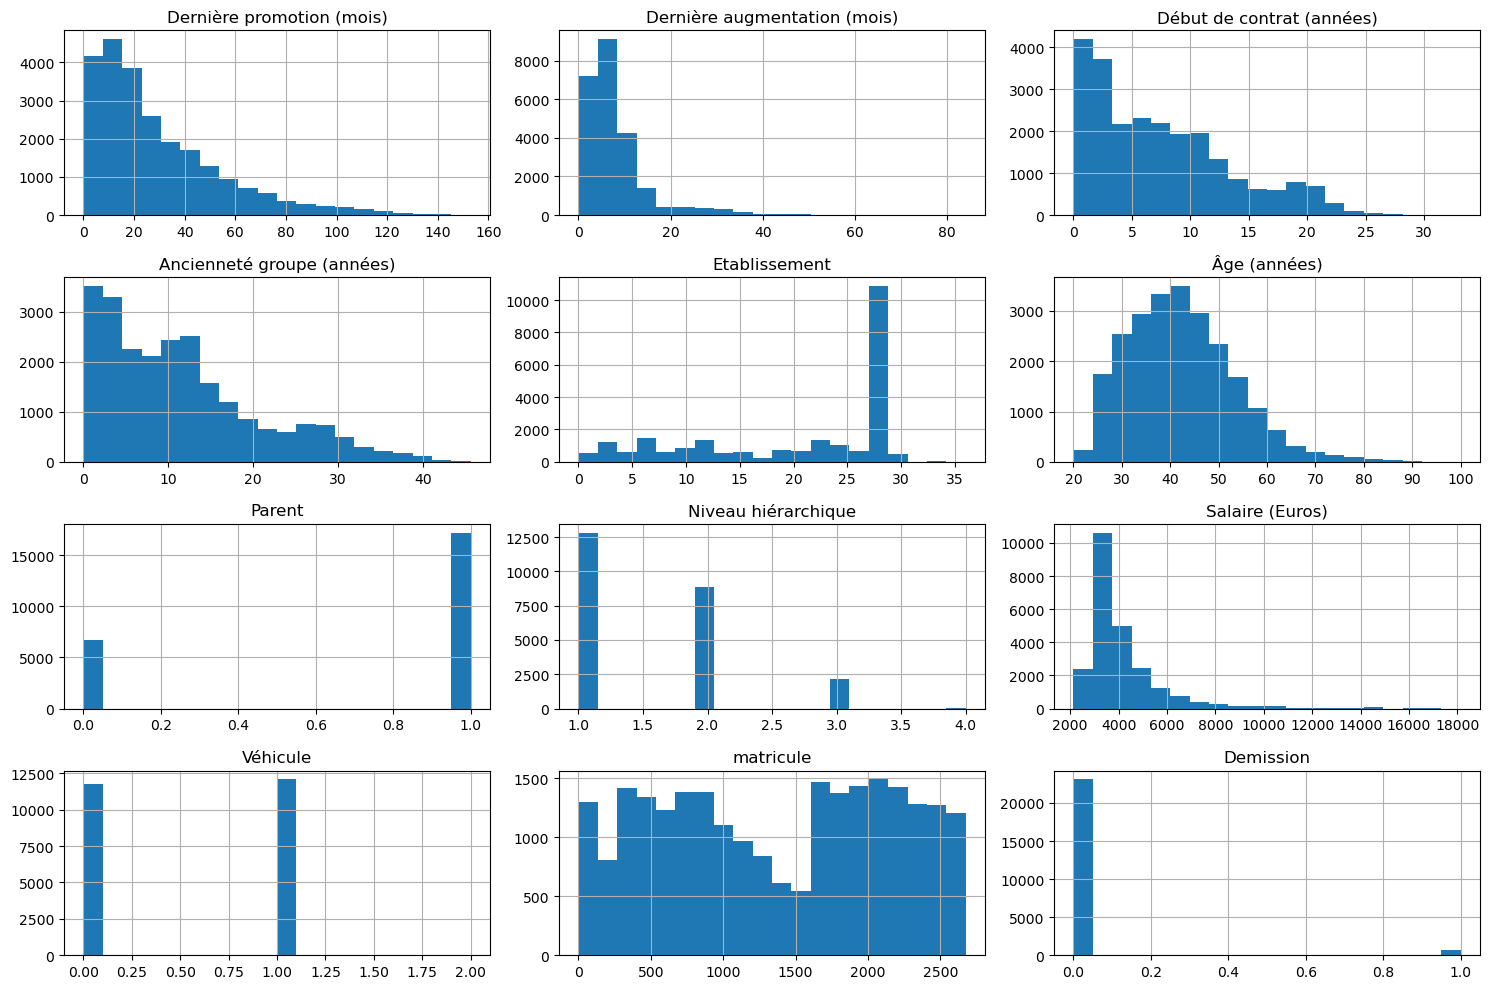

In [14]:
#Identification des colonnes numériques et catégorielles
num_cols = data.select_dtypes(include=["int64", "float64"]).columns
cat_cols = data.select_dtypes(include=["object", "category"]).columns

print("Colonnes numériques :", num_cols.tolist())
print("Colonnes catégorielles :", cat_cols.tolist())

#Variables numériques
data[num_cols].hist(figsize=(15, 10), bins=20)
plt.tight_layout()
plt.show()

**Observations sur la répartition des données :**

- **Établissement prédominant**  
  Un seul établissement regroupe plus de 10 000 entrées, ce qui suggère que la majorité des données provient d’un même site.

- **Variables temporelles**  
  Les distributions de l’Âge, de l’Ancienneté, de la Dernière promotion et de la Dernière augmentation sont asymétriques. On y observe une forte concentration d’employés dans les classes récentes (faible nombre d’années ou de mois) et quelques cas s’étendant sur de longues périodes.

- **Salaire et Niveau hiérarchique**  
  La majorité des salariés se trouve dans des niveaux bas à moyens, tandis qu’une minorité présente des salaires plus élevés ou occupe des postes plus élevés dans la hiérarchie.

- **Variable cible (Demission)**  
  La démission est moins fréquente que la non-démission, indiquant un phénomène de turnover relativement rare.

**Conclusion :**  
Ces éléments mettent en évidence des **zones de déséquilibre** (un établissement surreprésenté, une répartition inégale des variables clés) et la **présence possible d’outliers** (salaires très élevés, anciennetés extrêmes, etc.). Ils constituent un premier aperçu de la structure du dataset et guident les étapes ultérieures d’analyse et de modélisation.

C:\Users\Gabriel\AppData\Local\Temp\ipykernel_28716\3981719960.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette="pastel")


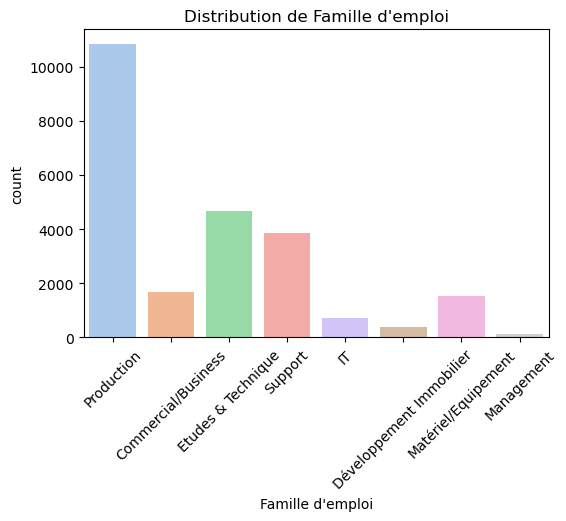

C:\Users\Gabriel\AppData\Local\Temp\ipykernel_28716\3981719960.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette="pastel")


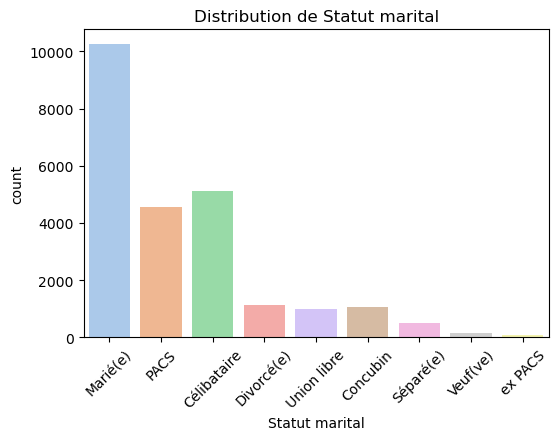

In [15]:
#Variables catégorielles
for col in cat_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=data, x=col, palette="pastel")
    plt.title(f"Distribution de {col}")
    plt.xticks(rotation=45)
    plt.show()

### 1.3 Matrice de corrélation

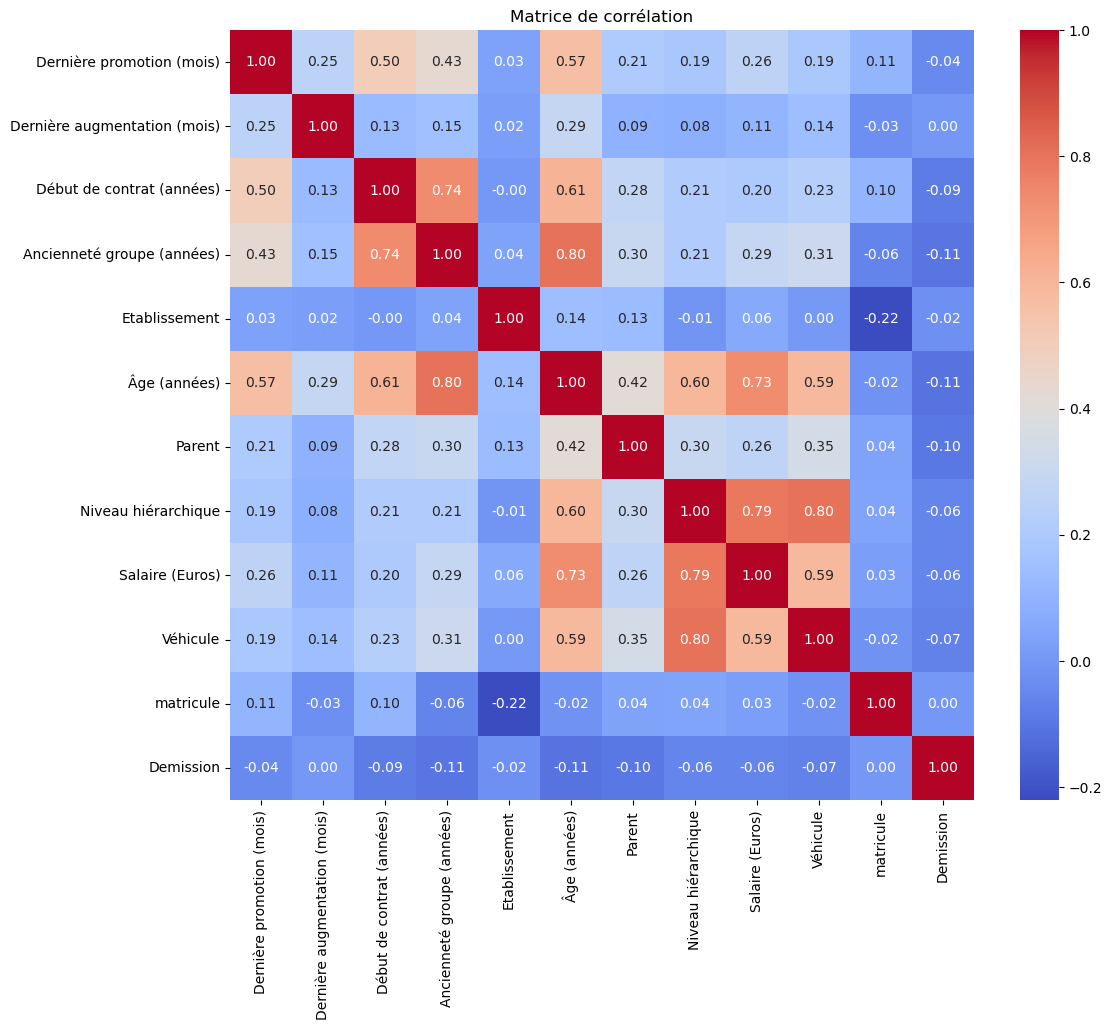

In [16]:
corr = data[num_cols].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matrice de corrélation")
plt.show()

#### Conclusion sur les variables les plus corrélées à la démission

- **Âge** : Corrélation négative modérée 
  > Plus l’âge est élevé, plus on observe une tendance (statistique) à ne pas démissionner, même si ce n’est pas une règle absolue.  

- **Ancienneté groupe (années)** : Corrélation négative 
  > Les employés les plus anciens semblent moins enclins à partir, possiblement grâce à leur stabilité ou avantages accumulés.  

- **Parent** : Corrélation positive 
  > Les employés ayant un ou plusieurs enfants semblent légèrement plus susceptibles de démissionner, peut-être pour des raisons liées à l’équilibre vie professionnelle / vie personnelle ou à d’autres facteurs contextuels.


Si on s'intéresse à la distribution de l'age (variable plus corrélé avec la démission) en fonction des variables catégoriques: 

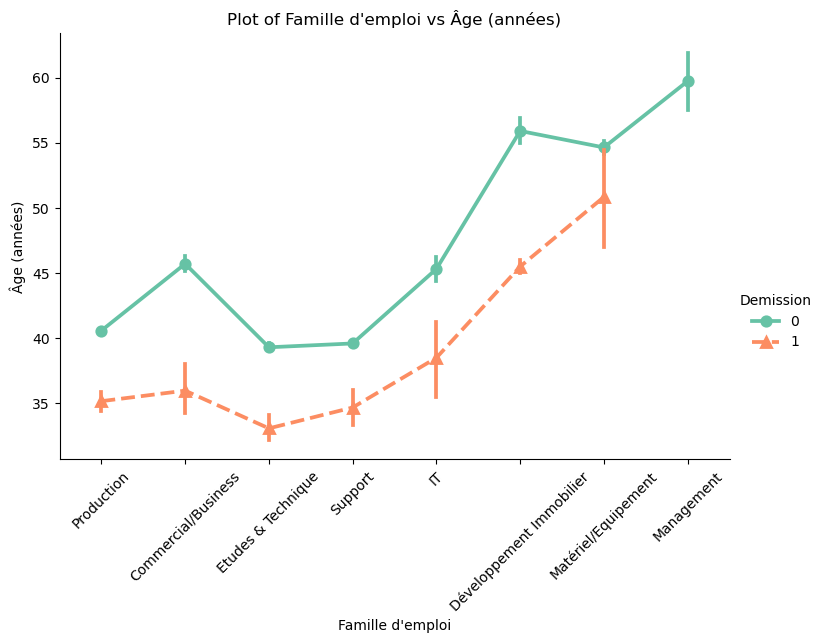

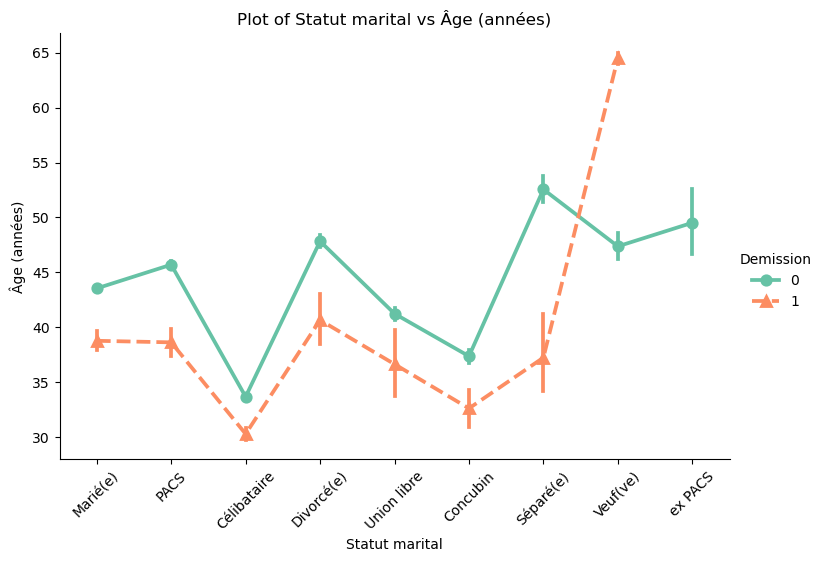

In [17]:
for col in cat_cols:
    g = sns.catplot(
        data=data,
        x=col,
        y='Âge (années)',
        hue='Demission',
        kind="point",  
        markers=["o", "^"],  
        linestyles=["-", "--"],  
        palette="Set2",  
        height=5,  
        aspect=1.5,
    )
    g.set_xticklabels(rotation=45)
    plt.title(f"Plot of {col} vs Âge (années)")
    plt.show()

Les deux graphiques ci-dessus présentent l’âge moyen (avec intervalle de confiance) selon deux variables catégorielles : **Famille d’emploi** (Production, Commercial/Business, etc.) et **Statut marital** (Marié(e), Célibataire, etc.), tout en séparant les employés ayant démissionné (Demission = 1) de ceux qui sont restés (Demission = 0).

#### 1. Âge moyen par Famille d’emploi

- **Observation générale** : Dans chaque famille d’emploi, la courbe « Demission = 0 » (employés restés) est systématiquement plus élevée que la courbe « Demission = 1 » (employés démissionnaires). Cela indique que, **dans ce dataset**, les employés qui restent sont en moyenne plus âgés que ceux qui partent.
- **Variations selon le domaine** : Certaines familles d’emploi (par ex. *Management*, *Matériel/Équipement*, *Développement Immobilier*) affichent des âges moyens plus élevés que d’autres (comme *Production* ou *Commercial/Business*). Les écarts entre la population qui reste et celle qui démissionne varient aussi selon le secteur.
- **Possibles explications** :
  - Les postes plus qualifiés ou à responsabilités (Management, Immobilier…) peuvent être occupés par des salariés plus expérimentés et plus âgés, souvent plus stables professionnellement.
  - Les secteurs comme la Production ou le Commercial peuvent attirer ou concerner une population plus jeune, potentiellement plus mobile.

#### 2. Âge moyen par Statut marital

- **Tendance globale** : De la même façon, on remarque que pour chaque statut marital (Marié(e), Célibataire, etc.), la moyenne d’âge des employés qui restent (Demission = 0) est supérieure à celle de ceux qui partent (Demission = 1).
- **Cas particuliers** :
  - Les veufs(ves) et les ex-PACS affichent des âges moyens sensiblement plus élevés que d’autres statuts, ce qui n’est pas surprenant d’un point de vue sociologique (ces situations peuvent survenir plus tard dans la vie)

### 1.4 Exemple parcours d'un employé 
On va s'intéresser aux parcours:
- d’un employé qui a démissionné 
- d’un employé qui n’a pas démissionné

In [18]:
#Employé qui a démissionné
employe_demission = data[data["Demission"] == 1]
print(f"Nombre d'employés ayant démissionné: {employe_demission.shape[0]}")
print(f"Pourcentage d'employés ayant démissionné: {employe_demission.shape[0] / data.shape[0] * 100:.2f}%")
employe_demission.iloc[0]

Nombre d'employés ayant démissionné: 755
Pourcentage d'employés ayant démissionné: 3.16%


Famille d'emploi                 Production
Dernière promotion (mois)              5.24
Dernière augmentation (mois)            5.1
Début de contrat (années)              1.02
Ancienneté groupe (années)             1.75
Etablissement                            27
Âge (années)                             24
Parent                                    0
Niveau hiérarchique                       1
Salaire (Euros)                        2641
Statut marital                  Célibataire
Véhicule                                  0
matricule                              2619
Demission                                 1
Name: 3, dtype: object

**Employé ayant démissionné**  

Nous avons un employé **jeune** de **24 ans** qui a **démissionné très rapidement** de l'entreprise après **quasiment 2 ans d'ancienneté** dans le groupe (**1 an et 9 mois**). Il est intéressant de noter que celui-ci a eu **2 contrats au total**, car son **début de contrat** est inférieur à son **ancienneté dans le groupe** (peut-être dû à un **stage** ou à un **changement d'entreprise** faisant partie du même groupe).  

En raison de sa **récent arrivée** au sein du groupe, l'employé, travaillant en **Production**, ne dispose pas de **voiture de fonction** et occupe le **niveau hiérarchique le plus bas**. Cependant, on peut remarquer qu'il a reçu une **promotion récemment** (il y a **5 mois et demi**) et bénéficie d'un **salaire de 2641 euros par mois**.  

On peut se questionner sur les raisons de sa démission → sûrement dû à un **salaire insatisfaisant** proposé par l'**établissement 27** !


In [19]:
# Employé qui n'a pas démissionné
employe_not_demission = data[data["Demission"] == 0]
employe_not_demission.iloc[1]

Famille d'emploi                Production
Dernière promotion (mois)        35.119999
Dernière augmentation (mois)     22.690001
Début de contrat (années)            14.83
Ancienneté groupe (années)       16.299999
Etablissement                            7
Âge (années)                            45
Parent                                   1
Niveau hiérarchique                      2
Salaire (Euros)                       3861
Statut marital                    Marié(e)
Véhicule                                 1
matricule                             1890
Demission                                0
Name: 1, dtype: object

**Employé ne démissionnant pas**

Ici, nous avons un employé de **45 ans** travaillant dans la **production** qui n'a pas démissionné. Cet employé possède une longue expérience au sein du groupe, avec un **début de contrat remontant à environ 14,83 ans** et une **ancienneté de près de 16,3 ans**. On peut se questionner sur son premier contrat, qui pourrait avoir été réalisé dans une filiale ou une autre entité de l'établissement 7, ou encore dans le cadre d'un stage/alternance.

Sa **dernière promotion** remonte à environ **35,12 mois** et sa **dernière augmentation** à environ **22,69 mois**, ce qui témoigne d'une évolution professionnelle relativement lente (il n'a bénéficié que d'une seule augmentation, étant donné qu'il se trouve au 2ème niveau hiérarchique).

Ainsi, en **16 ans** au sein de cet établissement, l'employé n'a été promu qu'une seule fois, et cela il y a un peu moins de 3 ans. On peut alors se questionner sur les possibilités évolutives au sein du département de production.

Il bénéficie d'un **salaire mensuel de 3861 euros** ainsi que d'une **voiture de fonction**.

Sur le plan personnel, cet employé est **marié** et **a des enfants**.

## 2. Apprentissage automatique

## 2.1 Preprocessing

On exclut la colonne matricule qui permet seulment d'identifier un personne

In [20]:
X = X.drop("matricule", axis=1)

On sépare les labels selon leurs types, afin de : 
- Normaliser les données numériques. La normalisation est utile pour le modèle de regression logistique que l'on souhaite entrainer. À l'inverse des modèles basé sur des arbres de décisions qui sont peu sensibles aux échelles des données. 
- Encoder les données catégorielles, nécessaire pour les convertir dans un format numérique compéhensible par les modèles de Machine learning. 

In [21]:
categorial_cols = ["Famille d'emploi", "Statut marital"]
numerical_cols = ["Dernière promotion (mois)", "Dernière augmentation (mois)", 
                  "Début de contrat (années)", "Ancienneté groupe (années)", 
                  "Etablissement", "Âge (années)", "Parent", "Niveau hiérarchique", 
                  "Salaire (Euros)", "Véhicule"]

In [22]:
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import StandardScaler, OneHotEncoder

preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', StandardScaler(), numerical_cols),
        ('categoric', OneHotEncoder(handle_unknown='ignore'), categorial_cols)
    ]
)

## 2.2 Modèles 

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, random_state=42)
print("Nombre de sample dans l'ensemble de train:", X_train.shape[0])
print("Nombre de sample dans l'ensemble de test:", X_test.shape[0])
pourcentage_demission_train = round(((sum(y_train) / y_train.shape[0])*100), 2)
pourcentage_demission_test = round(((sum(y_test) / y_test.shape[0])*100), 2)
print("Pourcentage de démission dans l'ensemble de train:", pourcentage_demission_train)
print("Pourcentage de démission dans l'ensemble de test:", pourcentage_demission_test)

Nombre de sample dans l'ensemble de train: 4771
Nombre de sample dans l'ensemble de test: 19086
Pourcentage de démission dans l'ensemble de train: 3.12
Pourcentage de démission dans l'ensemble de test: 3.18


In [24]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

def train_evaluate (model, X_train, X_test, y_train, y_test, name):
    print("=-=-=-=-=", name, "=-=-=-=-=")

    model.fit(X_train, y_train)

    print(X_train.shape)

    y_pred = model.predict(X_test)

    print("Rapport de classification:")
    print(classification_report(y_test, y_pred))

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy - {name}: {accuracy}")
    
    plt.figure(figsize=(15, 6))
    conf = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(conf)
    disp.plot()
    plt.title(f"Matrice de confusion - {name}")
    plt.show()

    return model, accuracy, y_pred
    

### 3.1 - Régression Logistique

Le premier modèle que l'on met en place est une régression logistique. Ce modèle est simple avec une interprétabilité directe via ses coefficients. 

On souhaite corriger le déséquilibre des classes du dataset. Pour ce faire on utilise class_weight='balanced'. Étant donné que +96% des données appartiennent à la classe 0, sans équilibrage de classe le modèle va prédire toujours 0 et obtenir 96% d'accuracy en ignorant la classe minoritaire. 

En spécifiant class_weight à 'balanced', sklearn va assigner un poids à chaque classe basé sur leur fréquence dans le jeu de données. Ce paramètre sera spécifié pour les deux autres modèles également.

=-=-=-=-= Regression Logistique =-=-=-=-=
(4771, 12)
Rapport de classification:
              precision    recall  f1-score   support

           0       0.98      0.61      0.75     18480
           1       0.06      0.70      0.10       606

    accuracy                           0.61     19086
   macro avg       0.52      0.65      0.43     19086
weighted avg       0.95      0.61      0.73     19086

Accuracy - Regression Logistique: 0.6125432254008174


<Figure size 1500x600 with 0 Axes>

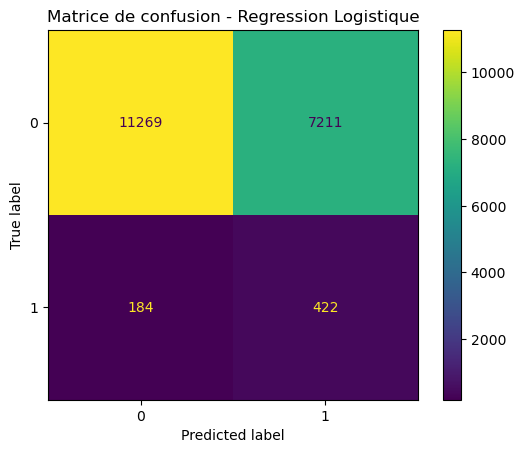

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

pipeline_reg_log = Pipeline([
    ('preprocess', preprocessor),
    ('classifier', LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced'))
])

model_reg_log, accuracy_reg_log, y_pred_reg_log = train_evaluate(pipeline_reg_log, X_train, X_test, y_train, y_test, 'Regression Logistique')

### 3.2 - Arbre de décision

Le second modèle mis en place est un arbre de décision. Ce modèle capture des relations non linéaires tout en restant plus ou moins interprétable. Le modèle reste interprétable via la visualisation de l'arbre. En effet, cela nous permet de comprendre les règles de décision. 

=-=-=-=-= Arbre de décision =-=-=-=-=
(4771, 12)
Rapport de classification:
              precision    recall  f1-score   support

           0       0.98      0.52      0.68     18480
           1       0.05      0.74      0.09       606

    accuracy                           0.53     19086
   macro avg       0.52      0.63      0.39     19086
weighted avg       0.95      0.53      0.66     19086

Accuracy - Arbre de décision: 0.53038876663523


<Figure size 1500x600 with 0 Axes>

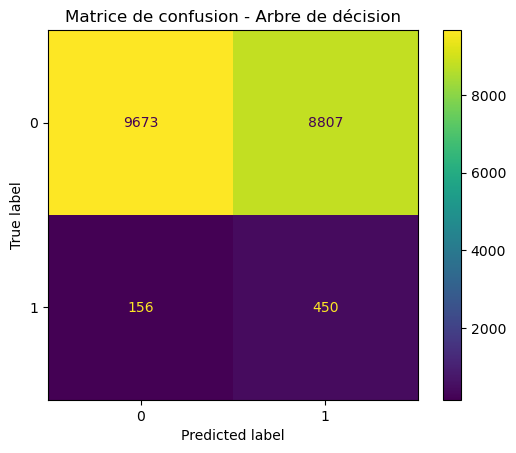

In [26]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

pipeline_DT = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42, max_depth=3, class_weight='balanced'))
])

model_DT, accuracy_DT, y_pred_DT = train_evaluate(pipeline_DT, X_train, X_test, y_train, y_test, 'Arbre de décision')

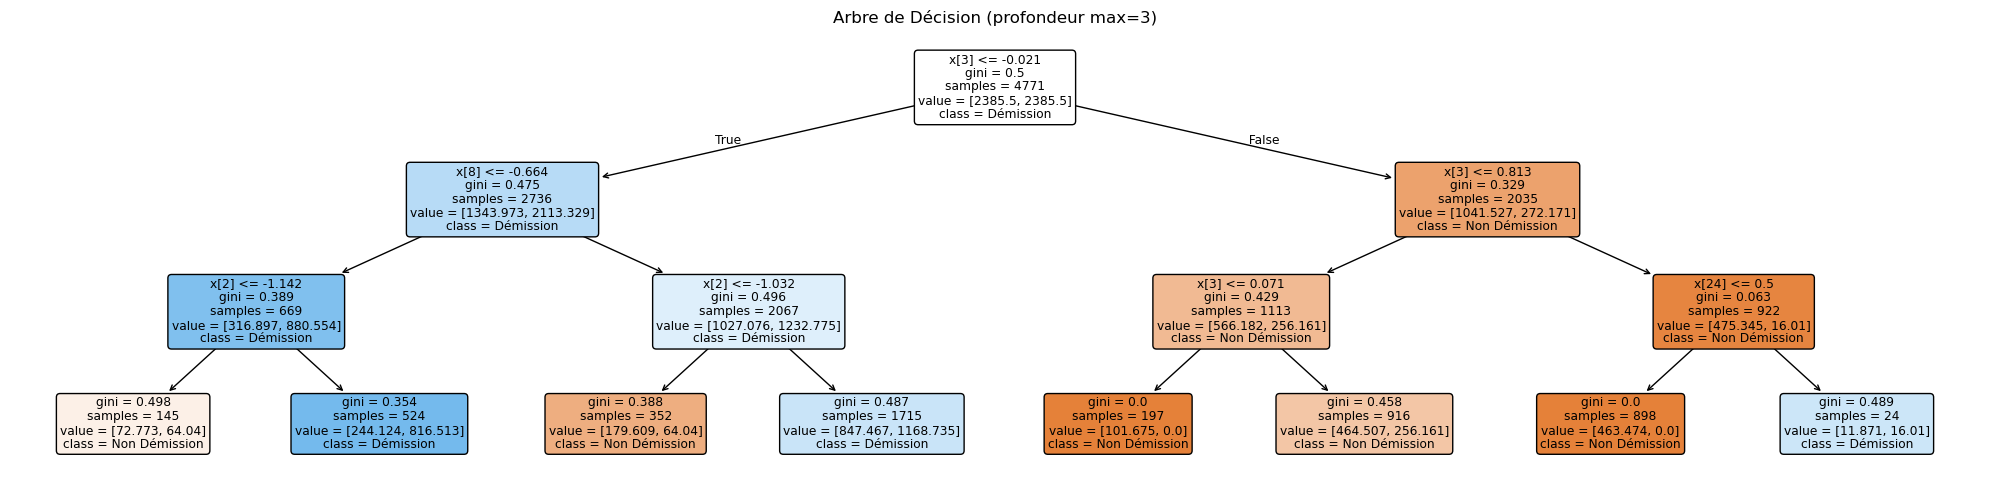

In [27]:
plt.figure(figsize=(20, 5))
plot_tree(model_DT.named_steps['classifier'], 
          class_names=['Non Démission', 'Démission'],
          filled=True, rounded=True)
plt.title('Arbre de Décision (profondeur max=3)')
plt.tight_layout()
plt.show()

### 3.3 - Random Forest

Le troisième modèle entrainé est un Random forest. Bien que ce soit un ensemble d'arbre, on devrait toujours pouvoir expliquer les résultats via l'interprétaion de l'importance des fetaures. Il devrait au final offrir de meilleures performances. 

=-=-=-=-= Random Forest =-=-=-=-=
(4771, 12)
Rapport de classification:
              precision    recall  f1-score   support

           0       0.98      0.88      0.92     18480
           1       0.09      0.37      0.15       606

    accuracy                           0.86     19086
   macro avg       0.53      0.62      0.54     19086
weighted avg       0.95      0.86      0.90     19086

Accuracy - Random Forest: 0.8619406895106361


<Figure size 1500x600 with 0 Axes>

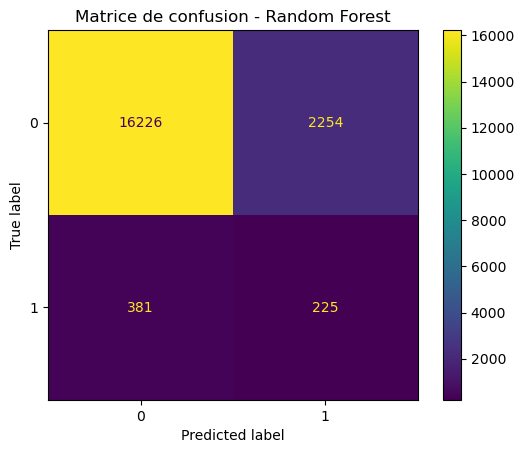

In [28]:
from sklearn.ensemble import RandomForestClassifier

pipeline_rf = Pipeline([
    ('prepocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42, n_estimators=100, max_depth=8, class_weight='balanced'))
])


model_rf, accuracy_rf, y_pred_rf = train_evaluate(pipeline_rf, X_train, X_test, y_train, y_test, 'Random Forest')

## 3. Analyse des résultats /Post Hoc

In [29]:
from sklearn.preprocessing import OneHotEncoder
from scipy import stats

# Prétraitement pour obtenir les caractéristiques après transformation
preprocessed_X_train = preprocessor.fit_transform(X_train)

# Récupérer les noms des caractéristiques après OneHotEncoding
ohe = OneHotEncoder(handle_unknown='ignore')
categorical_features = ohe.fit_transform(X_train[categorial_cols]).toarray()
feature_names_encoded = numerical_cols.copy()

# Récupérer les noms des catégories
ohe_categories = ohe.categories_
for i, category in enumerate(ohe_categories):
    for cat_value in category:
        feature_names_encoded.append(f"{categorial_cols[i]}_{cat_value}")

X_train_array = preprocessed_X_train.toarray() if hasattr(preprocessed_X_train, "toarray") else preprocessed_X_train

In [30]:
t_scores = []
p_values = []
for i in range(X_train_array.shape[1]):
    feature_values_class_0 = X_train_array[y_train == 0, i]
    feature_values_class_1 = X_train_array[y_train == 1, i]
    
    # Calculer le t-test
    t_stat, p_val = stats.ttest_ind(feature_values_class_0, feature_values_class_1, equal_var=False)
    
    # Si t_stat est NaN
    if np.isnan(t_stat):
        t_stat = 0
        p_val = 1
    
    t_scores.append(abs(t_stat))  # On utilise la valeur absolue pour le tri
    p_values.append(p_val)

#DataFrame pour afficher les résultats
feature_importance = pd.DataFrame({
    'Feature': feature_names_encoded,
    'T-score': t_scores,
    'P-value': p_values
})

feature_importance = feature_importance.sort_values(by='T-score', ascending=False)

print("Calcul des t-scores pour chaque caractéristique...")
print("T-scores et p-values pour chaque caractéristique (triés par importance):")
print(feature_importance)

significant_features = feature_importance[feature_importance['P-value'] < 0.05]['Feature'].tolist()
print(f"Nombre de caractéristiques statistiquement significatives: {len(significant_features)}")
print(f"Caractéristiques significatives: {significant_features}")

# Caractéristiques non significatives à enlever (p-value > 0.05)
non_significant_features = feature_importance[feature_importance['P-value'] >= 0.05]['Feature'].tolist()
print(f"Caractéristiques non significatives à enlever: {non_significant_features}")

# Créer des masques pour sélectionner les caractéristiques
numerical_mask = [col in significant_features for col in numerical_cols]
significant_numerical = [col for col in numerical_cols if col in significant_features]

Calcul des t-scores pour chaque caractéristique...
T-scores et p-values pour chaque caractéristique (triés par importance):
                                      Feature    T-score       P-value
3                  Ancienneté groupe (années)  13.927417  1.166038e-30
5                                Âge (années)  11.068072  8.802693e-22
2                   Début de contrat (années)   9.584676  1.044775e-17
8                             Salaire (Euros)   7.776536  5.370561e-13
7                         Niveau hiérarchique   5.940999  1.645625e-08
6                                      Parent   5.935033  1.841792e-08
9                                    Véhicule   5.442966  1.944725e-07
15       Famille d'emploi_Matériel/Equipement   5.265321  3.663696e-07
14                Famille d'emploi_Management   5.210832  1.961806e-07
25                    Statut marital_Veuf(ve)   4.911217  9.363648e-07
26                     Statut marital_ex PACS   3.878864  1.064050e-04
19                 Statu

## 4. Réentraînement avec le jeu de données réduit

In [31]:
numerical_cols_reduced = [col for col in numerical_cols if col != "Dernière augmentation (mois)"]

preprocessor_reduced = ColumnTransformer(
    transformers=[
        ('numeric', StandardScaler(), numerical_cols_reduced),
        ('categoric', OneHotEncoder(handle_unknown='ignore'), categorial_cols)
    ]
)

pipeline_reg_log_reduced = Pipeline([
    ('preprocess', preprocessor_reduced),
    ('classifier', LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced'))
])

pipeline_DT_reduced = Pipeline([
    ('preprocessor', preprocessor_reduced),
    ('classifier', DecisionTreeClassifier(random_state=42, max_depth=3, class_weight='balanced'))
])

pipeline_rf_reduced = Pipeline([
    ('prepocessor', preprocessor_reduced),
    ('classifier', RandomForestClassifier(random_state=42, n_estimators=100, max_depth=8, class_weight='balanced'))
])

X_train_reduced = X_train.drop(columns=["Dernière augmentation (mois)"])
X_test_reduced = X_test.drop(columns=["Dernière augmentation (mois)"])


--- Modèle: Régression Logistique (Réduit) ---
=-=-=-=-= Regression Logistique (Réduit) =-=-=-=-=
(4771, 11)
Rapport de classification:
              precision    recall  f1-score   support

           0       0.98      0.61      0.75     18480
           1       0.06      0.70      0.10       606

    accuracy                           0.61     19086
   macro avg       0.52      0.66      0.43     19086
weighted avg       0.95      0.61      0.73     19086

Accuracy - Regression Logistique (Réduit): 0.6119144922980195


<Figure size 1500x600 with 0 Axes>

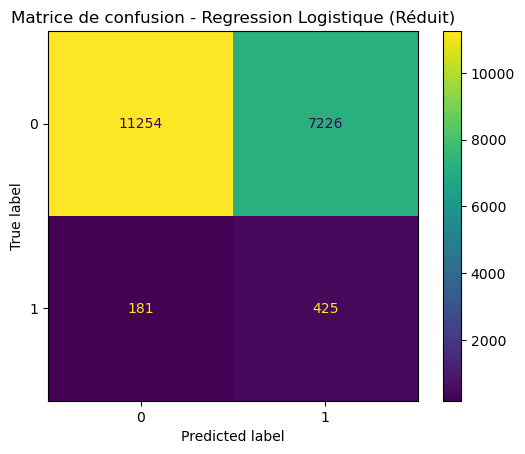


--- Modèle: Arbre de Décision (Réduit) ---
=-=-=-=-= Arbre de décision (Réduit) =-=-=-=-=
(4771, 11)
Rapport de classification:
              precision    recall  f1-score   support

           0       0.98      0.52      0.68     18480
           1       0.05      0.74      0.09       606

    accuracy                           0.53     19086
   macro avg       0.52      0.63      0.39     19086
weighted avg       0.95      0.53      0.66     19086

Accuracy - Arbre de décision (Réduit): 0.53038876663523


<Figure size 1500x600 with 0 Axes>

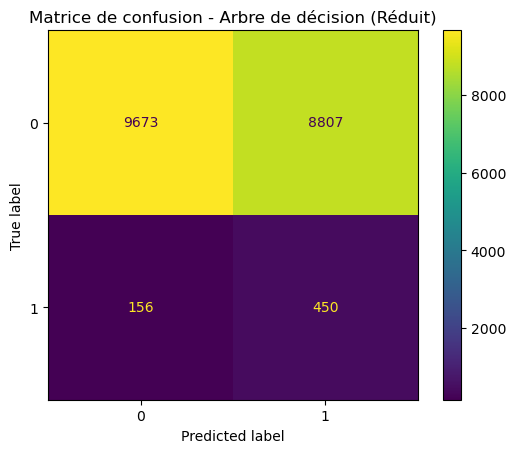


--- Modèle: Random Forest (Réduit) ---
=-=-=-=-= Random Forest (Réduit) =-=-=-=-=
(4771, 11)
Rapport de classification:
              precision    recall  f1-score   support

           0       0.98      0.88      0.93     18480
           1       0.09      0.37      0.15       606

    accuracy                           0.86     19086
   macro avg       0.53      0.63      0.54     19086
weighted avg       0.95      0.86      0.90     19086

Accuracy - Random Forest (Réduit): 0.862569422613434


<Figure size 1500x600 with 0 Axes>

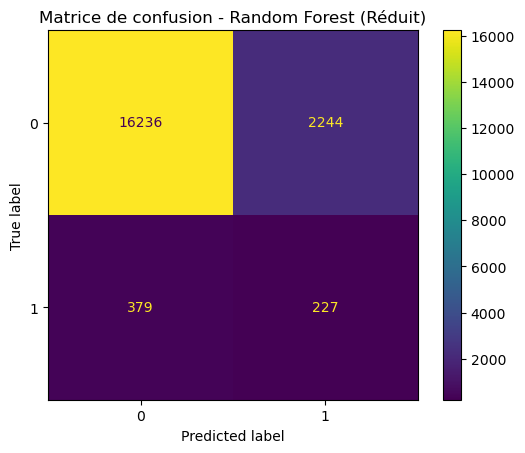

In [32]:
print("\n--- Modèle: Régression Logistique (Réduit) ---")
model_reg_log_reduced, accuracy_reg_log_reduced, y_pred_reg_log_reduced = train_evaluate(
    pipeline_reg_log_reduced, X_train_reduced, X_test_reduced, y_train, y_test, 'Regression Logistique (Réduit)'
)

print("\n--- Modèle: Arbre de Décision (Réduit) ---")
model_DT_reduced, accuracy_DT_reduced, y_pred_DT_reduced = train_evaluate(
    pipeline_DT_reduced, X_train_reduced, X_test_reduced, y_train, y_test, 'Arbre de décision (Réduit)'
)

print("\n--- Modèle: Random Forest (Réduit) ---")
model_rf_reduced, accuracy_rf_reduced, y_pred_rf_reduced = train_evaluate(
    pipeline_rf_reduced, X_train_reduced, X_test_reduced, y_train, y_test, 'Random Forest (Réduit)'
)

results = pd.DataFrame({
    'Modèle': ['Régression Logistique', 'Arbre de Décision', 'Random Forest', 
               'Régression Logistique (Réduit)', 'Arbre de Décision (Réduit)', 'Random Forest (Réduit)'],
    'Accuracy': [accuracy_reg_log, accuracy_DT, accuracy_rf,
                accuracy_reg_log_reduced, accuracy_DT_reduced, accuracy_rf_reduced]
})


--- Comparaison des performances avant et après réduction ---
                           Modèle  Accuracy
0           Régression Logistique  0.612543
1               Arbre de Décision  0.530389
2                   Random Forest  0.861941
3  Régression Logistique (Réduit)  0.611914
4      Arbre de Décision (Réduit)  0.530389
5          Random Forest (Réduit)  0.862569


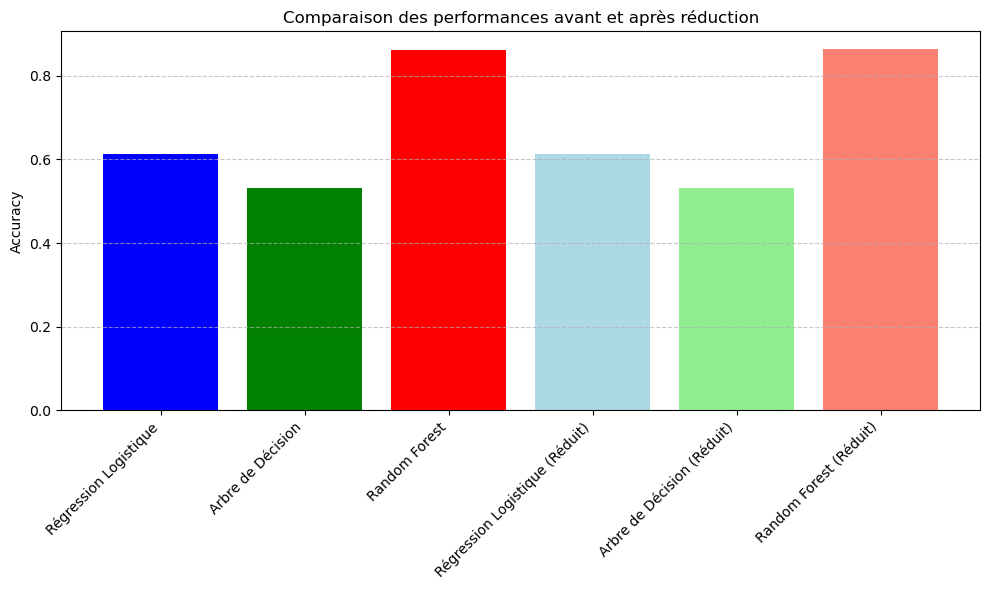

In [33]:
print("\n--- Comparaison des performances avant et après réduction ---")
print(results)

# Visualisation des performances
plt.figure(figsize=(10, 6))
plt.bar(results['Modèle'], results['Accuracy'], color=['blue', 'green', 'red', 'lightblue', 'lightgreen', 'salmon'])
plt.title('Comparaison des performances avant et après réduction')
plt.ylabel('Accuracy')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

 Cette visualisation montre que la réduction des caractéristiques a légèrement amélioré l'accuracy pour le random forest mais pas pour les deux autres modèles.